In [15]:
import numpy as np
data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)

0.491

In [16]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

0.478

In [17]:
def bern_pmf(x, p):
    if (x == 1):
        return p
    elif (x == 0):
        return 1 - p
    else:
        return "Value Not in Support of Distribution"

In [26]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.5
0.5


In [27]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


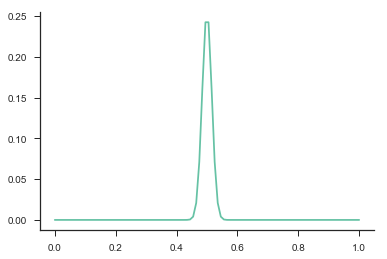

In [21]:
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

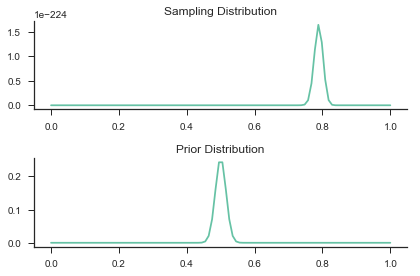

In [22]:
unfair_flips = bernoulli_flips = np.random.binomial(n=1, `, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

In [23]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

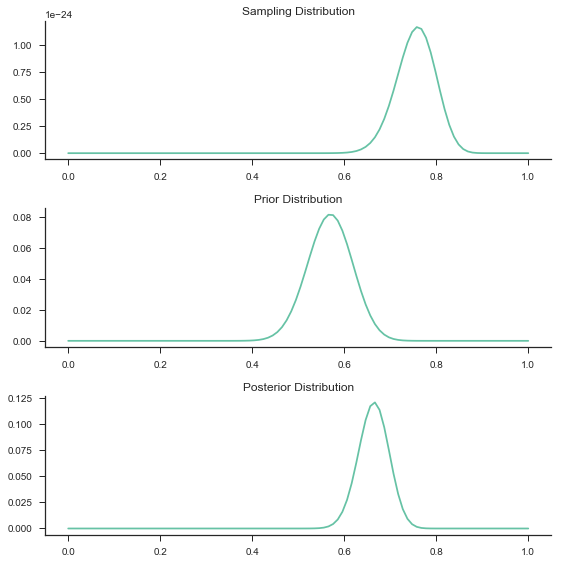

In [24]:
example_post = bern_post()

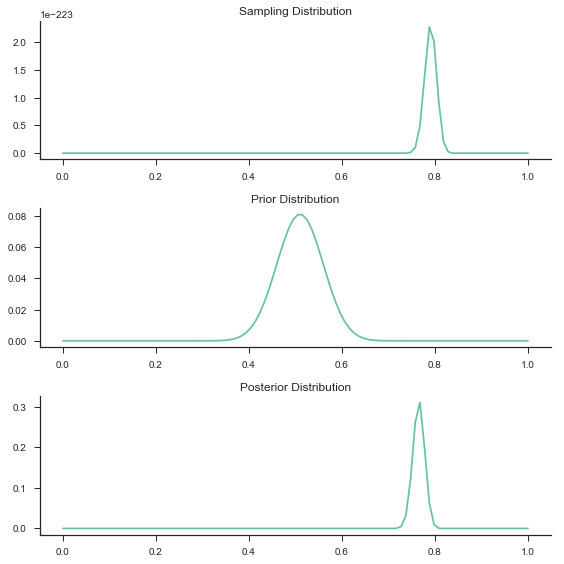

In [25]:
moredata_post = bern_post(n_sample=1000)

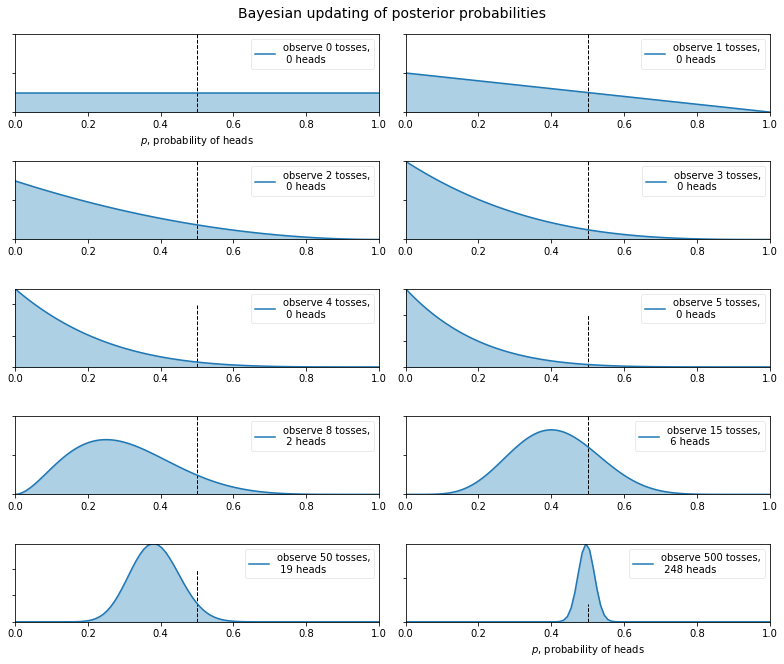

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()